In [1]:
import seaborn as sns
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates

ModuleNotFoundError: No module named 'seaborn'

In [2]:
countries_mean = pd.read_csv('fig3_top28_ce_nce_mean_difference.csv')

NameError: name 'pd' is not defined

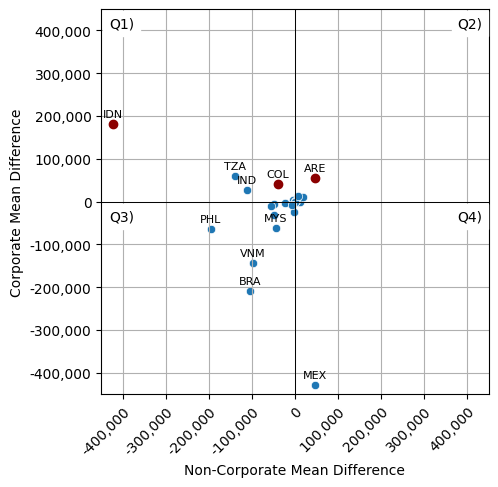

In [34]:
y=countries_mean["difference_corporate"]
x=countries_mean["difference_non_corporate"]
n = countries_mean['name']


fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=countries_mean,
                y="difference_corporate",
                x="difference_non_corporate",
                #hue = 'name'
               #label = None
)

#sns.regplot(data=countries_mean, x="difference_non_corporate", y="difference_corporate", scatter=False)

ax.set_ylabel('Corporate Mean Difference', fontsize = 10)
ax.set_xlabel('Non-Corporate Mean Difference', fontsize = 10)

ax.text(0.02, 0.98, 'Q1)', horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize = 10, backgroundcolor = 'white')
ax.text(0.92, 0.98, 'Q2)', horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize = 10, backgroundcolor = 'white')
ax.text(0.02, 0.48, 'Q3)', horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize = 10,backgroundcolor = 'white')
ax.text(0.92, 0.48, 'Q4)', horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize = 10, backgroundcolor = 'white')


th1 = 25000
for i, txt in enumerate(n):
    # Add condition to skip annotation for points with specific label
    if countries_mean['name'][i] not in ['MMR', 'URY', 'ZAF', 'CHL']:  # Specify labels you want to skip
        if abs(x[i]) > th1 or abs(y[i]) > th1:  # Check if point lies outside the threshold
            ax.annotate(txt, (x[i], y[i]), xytext=(0,5), textcoords='offset points', ha='center', fontsize=8)

country_hex = ['IDN', 'ARE', 'COL',] 
for name in country_hex:
    index = countries_mean[countries_mean['name'] == name].index.values[0]
    ax.scatter(x[index], y[index], color='darkred', label=name)


ax.axhline(0, color='black',linewidth=0.7)
ax.axvline(0, color='black',linewidth=0.7)

ax.set_xlim(-450000,450000)
ax.set_ylim(-450000,450000)
#ax.set_yscale('log')
#ax.set_xscale('log')

ax.grid()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

#ax.xaxis.set_major_locator(plt.MaxNLocator(6))

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.savefig('top28_countires_mean_difference_scatter_v4.png', dpi=300, bbox_inches='tight', pad_inches=0.1, facecolor='white')

plt.show()